## Week 2


### Exercise
- Use and experience methods from previous lessons with given data. Try to search for other pandas methods to analyze the data such as groupby() and read_csv().

In [2]:
# You can find covid related data under project's data folder 
base_url = "../data/covid/"
infected_dataset_url = base_url + "time_series_covid19_confirmed_global.csv"
recovered_dataset_url = base_url + "time_series_covid19_recovered_global.csv"
deaths_dataset_url = base_url + "time_series_covid19_deaths_global.csv"

### Solution

In [17]:
# Your code goes here
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [23]:
infected_df = pd.read_csv(infected_dataset_url)
recovered_df = pd.read_csv(recovered_dataset_url)
deaths_df = pd.read_csv(deaths_dataset_url)

In [20]:
def summary(df):
    print("HEAD")
    print(df.head())
    print("TAIL")
    print(df.tail())
    print("INFO")
    print(df.info())
    print("SHAPE")
    print(df.shape)
    print("DESCRIBE")
    print(df.describe())
    print("STATISTICALLY SUMMARY")
    print(df.describe().plot().legend(loc='center left', bbox_to_anchor=(1, 0.5)))
    print("NULL")
    print(df.isnull().sum())
   


HEAD
  Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  1/25/20  \
0    Afghanistan  33.0000  65.0000        0        0        0        0   
1        Albania  41.1533  20.1683        0        0        0        0   
2        Algeria  28.0339   1.6596        0        0        0        0   
3        Andorra  42.5063   1.5218        0        0        0        0   
4         Angola -11.2027  17.8739        0        0        0        0   

   1/26/20  1/27/20  1/28/20  ...  6/6/20  6/7/20  6/8/20  6/9/20  6/10/20  \
0        0        0        0  ...   19551   20342   20917   21459    22142   
1        0        0        0  ...    1232    1246    1263    1299     1341   
2        0        0        0  ...   10050   10154   10265   10382    10484   
3        0        0        0  ...     852     852     852     852      852   
4        0        0        0  ...      88      91      92      96      113   

   6/11/20  6/12/20  6/13/20  6/14/20  6/15/20  
0    22890    23546    24102    

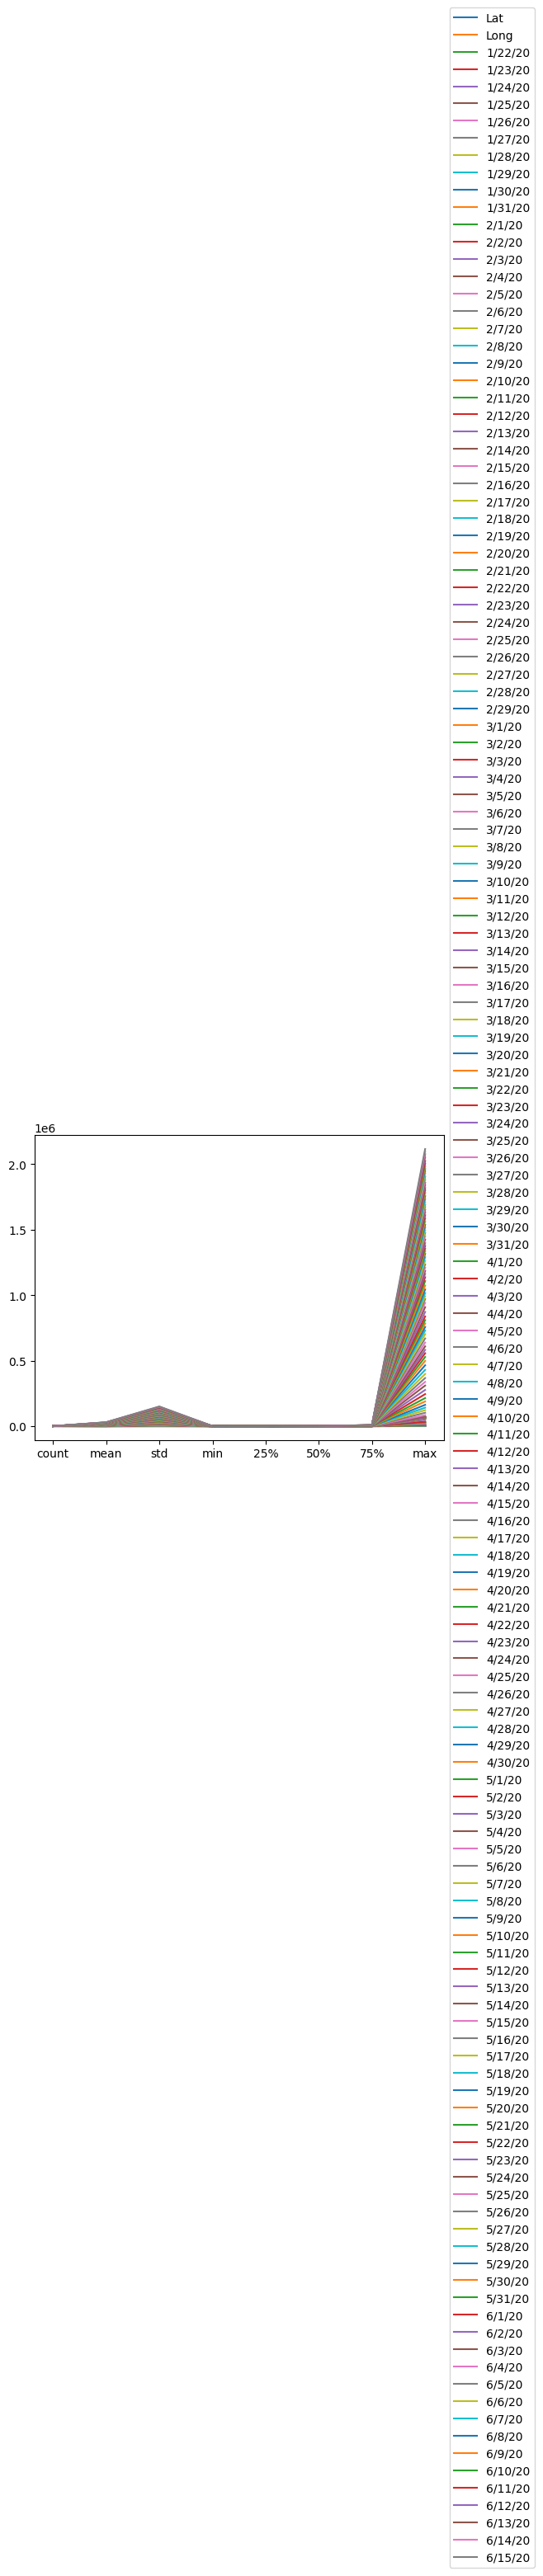

In [21]:
summary(infected_df)

In [24]:
infected_df.drop("Province/State", axis = 1, inplace = True)
recovered_df.drop("Province/State", axis = 1, inplace = True)
deaths_df.drop("Province/State", axis = 1, inplace = True)

In [25]:
infected_df

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20
0,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,...,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527
1,Albania,41.153300,20.168300,0,0,0,0,0,0,0,...,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590
2,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,...,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031
3,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,...,852,852,852,852,852,852,853,853,853,853
4,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,...,88,91,92,96,113,118,130,138,140,142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,0,...,499,513,513,514,611,632,639,659,661,662
262,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,...,482,484,496,524,560,591,632,705,728,844
263,Comoros,-11.645500,43.333300,0,0,0,0,0,0,0,...,141,141,141,141,162,162,163,176,176,176
264,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,0,...,4453,4529,4609,4690,4763,4834,4902,4971,5035,5097


In [26]:
infected_df2 = pd.DataFrame()
recovered_df2 = pd.DataFrame()
deaths_df2 = pd.DataFrame()

In [33]:
for col in infected_df.iloc[:,3:]:
    df = infected_df.iloc[:,:3]
    df["Dates"] = col
    df["Infected"] = infected_df[col]
    infected_df2 = pd.concat([infected_df2, df], ignore_index=True)

In [34]:
for col in recovered_df.iloc[:,3:]:
    df = recovered_df.iloc[:,:3]
    df["Dates"] = col
    df["Recovered"] = recovered_df[col]
    recovered_df2= pd.concat([recovered_df2, df], ignore_index=True)

In [35]:
for col in deaths_df.iloc[:,3:]:
    df = deaths_df.iloc[:,:3]
    df["Dates"] = col
    df["Deaths"] = deaths_df[col]
    deaths_df2 = pd.concat([deaths_df2, df], ignore_index=True)

In [38]:
df = pd.concat([infected_df2, recovered_df2.iloc[:,-1:]] , axis =1, ignore_index=True)
df2=pd.concat([df, deaths_df2.iloc[:,-1:]],  axis =1, ignore_index=True)


In [39]:

df2

,0,1,2,3,4,5,6
0,Afghanistan,33.000000,65.000000,1/22/20,0,0.0,0
1,Albania,41.153300,20.168300,1/22/20,0,0.0,0
2,Algeria,28.033900,1.659600,1/22/20,0,0.0,0
3,Andorra,42.506300,1.521800,1/22/20,0,0.0,0
4,Angola,-11.202700,17.873900,1/22/20,0,0.0,0
...,...,...,...,...,...,...,...
38831,Sao Tome and Principe,0.186360,6.613081,6/15/20,662,NaN,12
38832,Yemen,15.552727,48.516388,6/15/20,844,NaN,208
38833,Comoros,-11.645500,43.333300,6/15/20,176,NaN,2
38834,Tajikistan,38.861034,71.276093,6/15/20,5097,NaN,50


In [41]:
df2.columns = ["Country/Region", "Lat", "Long", "Dates", "Infected", "Recovered","Deaths"]

In [43]:
df2

,Country/Region,Lat,Long,Dates,Infected,Recovered,Deaths
0,Afghanistan,33.000000,65.000000,1/22/20,0,0.0,0
1,Albania,41.153300,20.168300,1/22/20,0,0.0,0
2,Algeria,28.033900,1.659600,1/22/20,0,0.0,0
3,Andorra,42.506300,1.521800,1/22/20,0,0.0,0
4,Angola,-11.202700,17.873900,1/22/20,0,0.0,0
...,...,...,...,...,...,...,...
38831,Sao Tome and Principe,0.186360,6.613081,6/15/20,662,NaN,12
38832,Yemen,15.552727,48.516388,6/15/20,844,NaN,208
38833,Comoros,-11.645500,43.333300,6/15/20,176,NaN,2
38834,Tajikistan,38.861034,71.276093,6/15/20,5097,NaN,50


In [44]:
df2.isnull().sum()

Country/Region       0
Lat                  0
Long                 0
Dates                0
Infected             0
Recovered         1898
Deaths               0
dtype: int64

In [45]:
df2["Recovered"] = df2["Recovered"].fillna(0)

In [46]:
df2.groupby("Country/Region")[["Infected", "Recovered", "Deaths"]].sum()

,Infected,Recovered,Deaths
Country/Region,,,
Afghanistan,565908,404175.0,11435
Albania,66394,956345.0,2308
Algeria,439739,567441.0,37166
Andorra,58079,133920.0,3239
Angola,3866,108526.0,219
...,...,...,...
West Bank and Gaza,29314,436967.0,173
Western Sahara,487,358390.0,21
Yemen,12286,359111.0,2670
